<a href="https://colab.research.google.com/github/swadhwa5/MLFinalProject/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp
from skimage import filters
from torchvision import transforms
import cv2
import scipy
import random

In [ ]:
# This is the beginning of the Data Augmentation Code

In [18]:
#Load Data
# return array of images
def loadImages(path):
    imagesList = listdir(path)
    imgs = []
    labels = []
    for image in imagesList:
      if imghdr.what(path + image) == 'png':
        if (image[len(image) - 13] == '1' and image[6].isalpha()): # only add 5 of each image, only add alphabetical values
          img = Image.open(path + image)
          imgs.append(img)
          labels.append(image[6]) # assumes that filename structure is 'handx_[label]_....'
    return imgs, labels

# Convert png img array to array np arrays
def ImagesToArray(imgs):
  imgs_array = []
  for img in imgs:
    img_array = np.array(img)
    imgs_array.append(img_array)
  return imgs_array

# Reshape Images   
def shape600(x):
  reshaped_array = np.zeros((len(x), 600, 600, 3))
  for i, img in enumerate(x):
    x_pad_width = (600 - img.shape[0])//2
    y_pad_width = (600 - img.shape[1])//2
    reshaped_array[i,:,:,:] = np.pad(img, ((x_pad_width, x_pad_width + (img.shape[0])%2), (y_pad_width, y_pad_width+(img.shape[1]%2)), (0,0)), constant_values=img[0][0][0])
  return reshaped_array

# Normalize images
def Normalize(imgs):
  new_imgs = []
  for img in imgs:
      # flat_img = img.flatten()
      m = np.mean(img)
      std = np.std(img)
      img = (img-m)/std
      new_imgs.append(img)
  return new_imgs

# x is input image, sd is how much to blur
def blur(imgs, sd=1):
  filtered_img = np.zeros((imgs.shape[0], 600, 600, 3))
  for i in range(imgs.shape[0]):
    filtered_img[i,:,:,:] = skimage.filters.gaussian(imgs[i,:,:,:], sigma=sd)
    #filtered_img.save('./Filter_gaussian/img_' + i + '_gaussianfilt.png')
  return filtered_img

def Scale(imgs):
  scaled_images = np.zeros((len(imgs), 600, 600, 3))
  for i, img in enumerate(imgs):
    ratio = random.range(.2, .5, .1)
    x = int(ratio * 600 / 2)
    scaled = img[x:600-x, x:600-x]
    # scaled = cv2.imread(scaled)
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    scaled_images[i] = res
  return scaled_images
    # final.save('./Crop/img_' + str(i) + '_scale.png')

def Brighten_light(imgs):
  Brightened_light_images = np.zeros((len(imgs), 600, 600, 3))
  for i in range (imgs.shape[0]):
    Brightened_light_images[i] = imgs[i] + (0.2, 0.2, 0.2)
    # light_img.save('./Brightness_light/img_' + str(i) + '_light.png')
  return Brightened_light_images

def Brighten_dark(imgs):
  Brightened_dark_images = np.zeros((len(imgs), 600, 600, 3))
  for i in range (imgs.shape[0]):
    Brightened_dark_images[i] = imgs[i] - (0.2, 0.2, 0.2)
    # dark_img.save('./Brightness_dark/img_' + str(i) + '_dark.png')
  return Brightened_dark_images

def Rotate30(imgs): 
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    rand_dir = random.choice([-1, 1])
    new_img = rotate(img, rand_dir * 30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

def VerticalFlip(imgs): 
  flip_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = np.fliplr(img)
    flip_imgs[i, :, :, :] = new_img
  return flip_imgs

def Translation(imgs): 
  trans_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    rand_x = random.randrange(-150, 150, 50)
    rand_y = random.randrange(-150, 150, 50)
    transform = AffineTransform(translation=(rand_x,rand_y))
    new_img = warp(img,transform, mode="constant")  
    trans_imgs[i, :] = new_img
  return trans_imgs

# load png_images
path = "./Data2/"

# images in an array named imgs
imgs, labels = loadImages(path)
# Step 1 convert png_images to np arrays
imgs_array_before = ImagesToArray(imgs)
imgs_array_normalize = Normalize(imgs_array_before)
imgs_array_reshaped = shape600(imgs_array_normalize)
rotated30_imgs = Rotate30(imgs_array_reshaped)
plt.figure()
plt.imshow(rotated30_imgs[0])

def Augment(imgs_array_before, i):
  # Step 2 Normalize images
  imgs_array_normalize = Normalize(imgs_array_before)

  # Step 3 Reshape the images
  imgs_array_reshaped = shape600(imgs_array_normalize)

  # Step 4 Blur the images
  blurred_imgs = blur(imgs_array_reshaped, 10)

  # Step 5 Scale the images
  scaled_imgs = Scale(imgs_array_reshaped)

  # Step 6 Brighten the images
  light_imgs = Brighten_light(imgs_array_reshaped)
  dark_imgs = Brighten_dark(imgs_array_reshaped)

  # Step 7 Flip the images
  flipped_imgs = VerticalFlip(imgs_array_reshaped)

  # Step 8 Add translation to images
  translated_imgs = Translation(imgs_array_reshaped)

  # Step 9 Rotate 30 Degrees
  rotated30_imgs = Rotate30(imgs_array_reshaped)

  # Step 10 combine all augmented images to np array of shape((num_augmentations + 1) * num_images, 600, 600, 3)
  final_imgs_temp = np.concatenate((imgs_array_reshaped, blurred_imgs, light_imgs, dark_imgs, scaled_imgs, translated_imgs, flipped_imgs, rotated30_imgs), 0)
  print(final_imgs_temp.shape)
  np.save('./FinalImages/imgs' + str(i) + '.npy', final_imgs_temp)
  # Show the progression of images for each step
  # fig, ax = plt.subplots(1, 11, figsize=(15,10))
  # ax[0].imshow(imgs_array_before[0]) # Step 1
  # ax[1].imshow(imgs_array_normalize[0]) # Step 2
  # ax[2].imshow(imgs_array_reshaped[0]) # Step 3
  # ax[3].imshow(blurred_imgs[0]) # Step 4
  # ax[4].imshow(scaled_imgs[0]) # Step 5
  # ax[5].imshow(light_imgs[0]) # Step 6
  # ax[6].imshow(dark_imgs[0]) # Step 6
  # ax[7].imshow(flipped_imgs[0]) # Step 7
  # ax[8].imshow(translated_imgs[0]) # Step 8
  # ax[9].imshow(rotated30_imgs[0]) # Step 9
  #ax[10].imshow(rotatedNeg30_imgs[0]) # Step 9
  return final_imgs_temp


hand1_v_left_seg_2_cropped.png
2
True
hand1_j_left_seg_5_cropped.png
5
True
hand1_w_left_seg_1_cropped.png
1
True
hand1_k_bot_seg_1_cropped.png
1
True
hand1_h_left_seg_3_cropped.png
3
True
hand1_n_bot_seg_3_cropped.png
3
True


In [ ]:
# This is the beginning of the feature extraction code

In [ ]:
# Feature: Get convexity of hand in the image
import alphashape
from descartes import PolygonPatch

def convex(imgs):
  out = np.empty((imgs.shape[0], 1))
  for i, img in enumerate(imgs): 
    orig = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    edges = cv2.Canny(orig,250,300)

    contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours = np.concatenate(contours)
    contours = contours.reshape((contours.shape[0], contours.shape[2]))

    alpha = alphashape.alphashape(contours, .01)
    convex = alphashape.alphashape(contours, 0.)

    out[i] = (alpha.area / convex.area)
    
    # fig, ax = plt.subplots()
    # ax.scatter(*zip(*contours))
    # ax.add_patch(PolygonPatch(alpha, alpha=0.2))
    # plt.show()

    # fig, ax = plt.subplots()
    # ax.scatter(*zip(*contours))
    # ax.add_patch(PolygonPatch(convex, alpha=0.2))
    # plt.show()

    # print(out[i])
  return out
print(convex(imgs_array_reshaped))


ModuleNotFoundError: ignored

In [ ]:
!pip install alphashape

     |████████████████████████████████| 642 kB 5.3 MB/s 
     |████████████████████████████████| 1.0 MB 46.2 MB/s 


[0.1691, 0.1538861111111111, 0.15298055555555556, 0.157125, 0.1672361111111111, 0.16684722222222223, 0.14885833333333334, 0.16542777777777778]
[0.5013472222222223, 0.4675944444444444, 0.74805, 0.49172777777777776, 0.6483944444444445, 0.7791638888888889, 0.5619805555555556, 0.3866805555555556]
[0.1691, 0.1538861111111111, 0.15298055555555556, 0.157125, 0.1672361111111111, 0.16680277777777777, 0.14885833333333334, 0.16542777777777778]
[0.1691, 0.1538861111111111, 0.15298055555555556, 0.157125, 0.1672361111111111, 0.16684722222222223, 0.14885833333333334, 0.16542777777777778]
[0.17647222222222222, 0.159575, 0.15806944444444446, 0.16299444444444444, 0.1733611111111111, 0.17253333333333334, 0.15499444444444443, 0.1713638888888889]
[0.17650555555555555, 0.15953333333333333, 0.15808055555555556, 0.1629972222222222, 0.1733861111111111, 0.17250833333333335, 0.1549638888888889, 0.17135]
(72,)


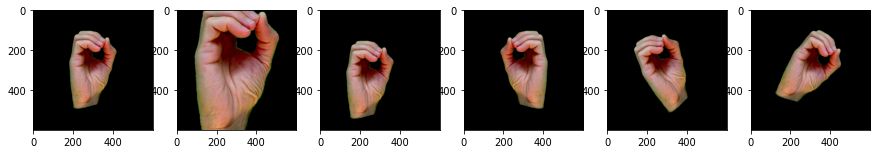

In [ ]:
# Feature: Get proportion of hand in the image

def HandToBack(imgs):
  features = [0] * imgs.shape[0]
  for i in range(imgs.shape[0]):
    img = imgs[i]
    total_pixels = img.shape[0] * img.shape[1]
    hand_pixels = 0
    # mean = np.mean(img)
    # std = np.std(img)
    # black_pixel_val = (0 - mean) / std
    img = np.reshape(img, (1, img.shape[0] * img.shape[1], 3))
    for j in range (img.shape[1]):
      if img[0][j][0] != 0 and img[0][j][1] != 0 and img[0][j][2] != 0:
        hand_pixels += 1
    features[i] =  hand_pixels / total_pixels

  return features
  
# Reshape Images   
def reshape(x):
  reshaped_array = np.zeros((len(x), 600, 600, 3))
  for i, img in enumerate(x):
    x_pad_width = (600 - img.shape[0])//2
    y_pad_width = (600 - img.shape[1])//2
    reshaped_array[i,:,:,:] = np.pad(img, ((x_pad_width, x_pad_width + (img.shape[0])%2), (y_pad_width, y_pad_width+(img.shape[1]%2)), (0,0)), constant_values=img[0][0][0])
  return reshaped_array.astype('uint8')


def Scale(imgs):
  scaled_images = np.zeros((len(imgs), 600, 600, 3))
  for i, img in enumerate(imgs):
    ratio = random.uniform(.3, .7)
    x = int(ratio * 600 / 2)
    scaled = img[x:600-x, x:600-x]
    # scaled = cv2.imread(scaled)
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    scaled_images[i] = res
  return scaled_images.astype('uint8')
    # final.save('./Crop/img_' + str(i) + '_scale.png')

def Rotate30(imgs): 
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = rotate(img, 30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

def RotateNeg30(imgs):
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = rotate(img, -30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

def VerticalFlip(imgs): 
  flip_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = np.fliplr(img)
    flip_imgs[i, :, :, :] = new_img
  return flip_imgs.astype('uint8')

def Translation(imgs): 
  trans_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    rand_x = random.randrange(-150, 150, 50)
    rand_y = random.randrange(-150, 150, 50)
    transform = AffineTransform(translation=(rand_x,rand_y))
    new_img = warp(img,transform, mode="constant")  
    trans_imgs[i, :] = new_img
  return trans_imgs



reshaped_imgs = reshape(imgs_array_before)
scaled_imgs_new = Scale(reshaped_imgs)
translated_imgs_new = Translation(reshaped_imgs)
flipped_imgs_new = VerticalFlip(reshaped_imgs)
rotated30_imgs_new = Rotate30(reshaped_imgs)
rotatedNeg30_imgs_new = RotateNeg30(reshaped_imgs)



fig, ax = plt.subplots(1, 6, figsize=(15,10))
ax[0].imshow(reshaped_imgs[0]) # Step 0
ax[1].imshow(scaled_imgs_new[0]) # Step 1
ax[2].imshow(translated_imgs_new[0]) # Step 2
ax[3].imshow(flipped_imgs_new[0]) # Step 3
ax[4].imshow(rotated30_imgs_new[0]) # Step 4
ax[5].imshow(rotatedNeg30_imgs_new[0]) # Step 5

features_orig = HandToBack(reshaped_imgs) #same for orig, blurred, brightened, darkened
features_scaled = HandToBack(scaled_imgs_new) # for scaled
features_translated = HandToBack(translated_imgs_new) # for translated
features_flipped = HandToBack(flipped_imgs_new) # for flipped
features_rotated30 = HandToBack(rotated30_imgs_new) # for rotated30
features_rotatedNeg30 = HandToBack(rotatedNeg30_imgs_new) # for rotatedNeg30

print(features_orig)
print(features_scaled)
print(features_translated)
print(features_flipped)
print(features_rotated30)
print(features_rotatedNeg30)

features_hand_to_back = np.concatenate((features_orig, features_orig, features_orig, features_orig, features_scaled, features_translated, features_flipped, features_rotated30, features_rotatedNeg30), 0)
print(features_hand_to_back.shape)

np.save('features_hand_to_back', features_hand_to_back)

In [ ]:
# Extras for Data Augmentation
# x is input image, sd is how much to blur
def GaussianBlur(imgs, sd=1):
  for i, img in enumerate(imgs):
    filtered_img = skimage.filters.gaussian(img, sigma=sd)
    filtered_img.save('./Filter_gaussian/img_' + str(i) + '_gaussianfilt.png')

import random
def Crop(imgs):
  n = 600
  for i, png in enumerate(imgs): 
    ratio = random.uniform(0, 1)
    size = n * ratio
    x = int(size / 2)
    img = np.asarray(png)
    cropped = img.copy()
    print(cropped.shape)
    cropped[0:x] = np.zeros((n, 3))
    cropped[img.shape[0] - x - 1:img.shape[0] - 1] = np.zeros((x, n, 3))
    cropped[:, 0:x] = np.zeros((n, x, 3))
    cropped[:, img.shape[1] - 1 - x:img.shape[1] - 1] = np.zeros((n, x, 3))
    final = Image.fromarray(np.uint8(cropped*255))
    return cropped
    # final.save('./Crop/img_' + str(i) + '_crop.png')

import cv2

def Scale(imgs):
  for i, img in enumerate(imgs):
    ratio = random.uniform(.3, .7)
    n = 600
    x = int(ratio * n / 2)
    scaled = img[x:n-x, x:n-x]
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    final = Image.fromarray(np.uint8(res*255))
    return res
    # final.save('./Crop/img_' + str(i) + '_scale.png')

### Additional Code: 4/20/22: Redid Shape function, normalize, and also completed blur. Each assumes images list --> shape-->normalize-->blur

import numpy as np
import skimage
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp
from skimage import filters
from torchvision import transforms
import cv2
import scipy
import random


from google.colab import files
# uploaded = files.upload() # Get a folder named Data.zip

!unzip Data2.zip

In [ ]:
rmdir './Data/.ipynb_checkpoints'

rmdir: failed to remove './Data/.ipynb_checkpoints': No such file or directory
